*Exploração inicial do dataset Car Crashes*

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Carregando dados iniciais e Descrição geral do dataset

In [9]:
car_crash = sns.load_dataset("car_crashes")
print("\nPrimeiro 5 registros do dataset:")
print(car_crash.head())
print("\nInformações do dataset:")
car_crash.info()





Primeiro 5 registros do dataset:
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     

Descrição geral do dataset


In [10]:

print("Estatísticas descritivas:")
car_crash.describe()

Estatísticas descritivas:


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [11]:
# type of the dataset
type(car_crash)
print(car_crash.columns)


Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')


Análise Univariada


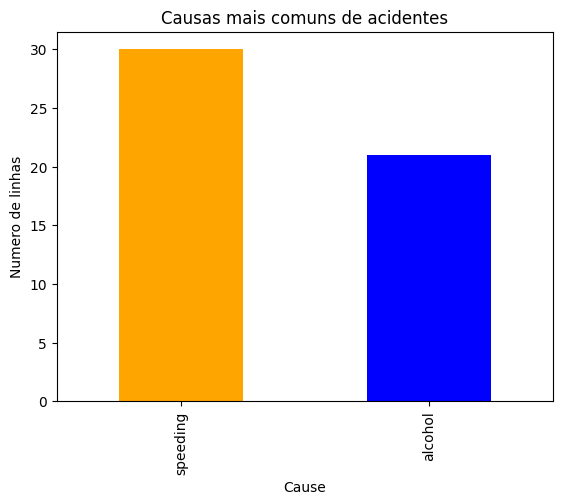

In [12]:
most_common_cause = np.where(car_crash['alcohol'] > car_crash['speeding'], 'alcohol', 'speeding')
pd.Series(most_common_cause).value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Causas mais comuns de acidentes')
plt.xlabel('Cause')
plt.ylabel('Numero de linhas')
plt.show()

EXCESSO DE VELOCIDADE - (speeding) causa mais acidentes
Quantidade de acidadentes causados pelo álcool: 249.226
Quantidade de acidadentes causados pelo excesso de velocidade: 254.908 


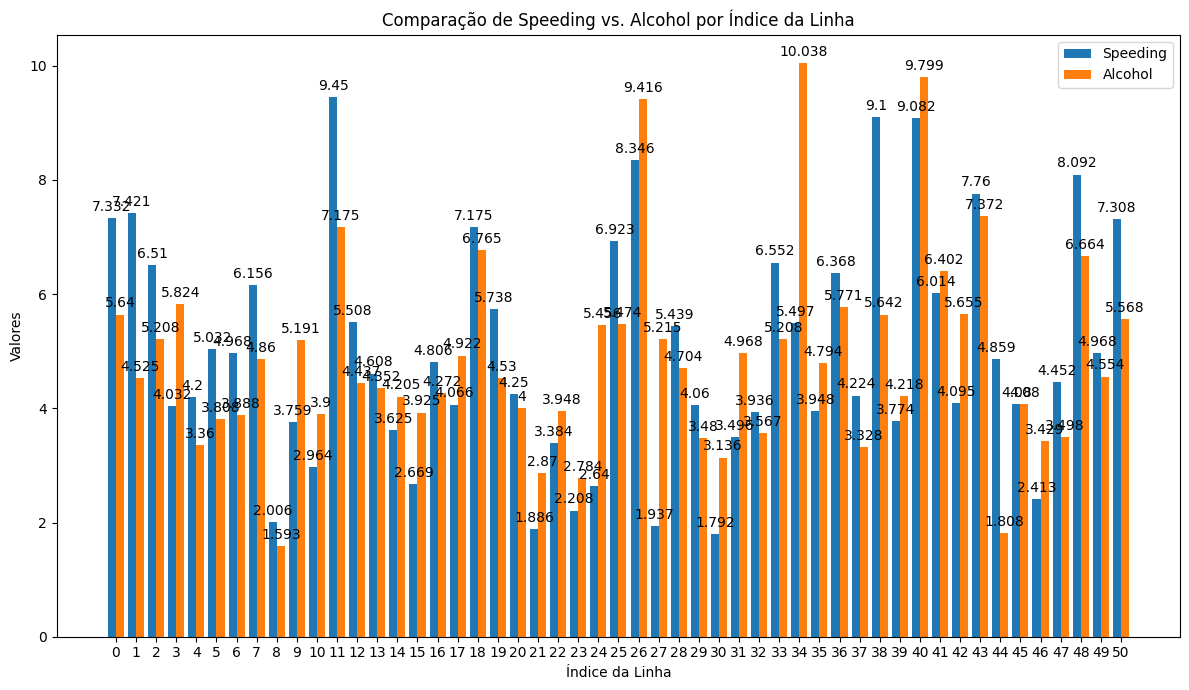

In [13]:
al_total = car_crash['alcohol'].sum()
sp_total = car_crash['speeding'].sum()

pacial_al_total = (car_crash['alcohol'] > car_crash['speeding']).sum()
pacial_sp_total = (car_crash['speeding'] > car_crash['alcohol']).sum()

x = np.arange(len(car_crash.index))
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, car_crash['speeding'], width, label='Speeding')
rects2 = ax.bar(x + width/2, car_crash['alcohol'], width, label='Alcohol')
# legendas
ax.set_ylabel('Valores')
ax.set_xlabel('Índice da Linha') # O eixo X agora representa o índice
ax.set_title('Comparação de Speeding vs. Alcohol por Índice da Linha')
ax.set_xticks(x)
ax.set_xticklabels(car_crash.index) # Usa o índice numérico (0, 1, 2...) como etiquetas
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

if al_total > sp_total:
    print("ÁLCOOL - (alcohol) causa mais acidentes")
else:
    print("EXCESSO DE VELOCIDADE - (speeding) causa mais acidentes")
print(f"Quantidade de acidadentes causados pelo álcool: {al_total:.3f}\nQuantidade de acidadentes causados pelo excesso de velocidade: {sp_total:.3f} ")

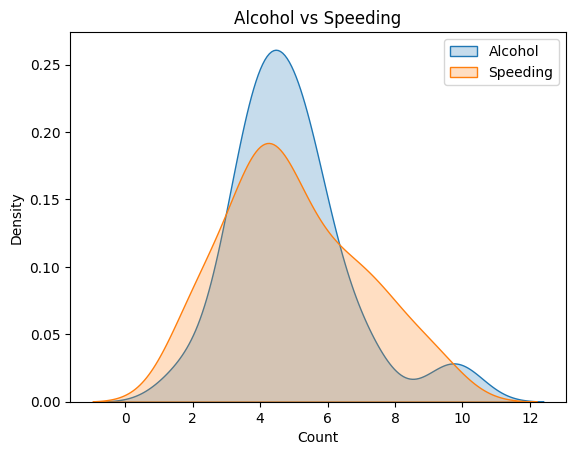

In [14]:
sns.kdeplot(car_crash['alcohol'], label='Alcohol', fill=True)
sns.kdeplot(car_crash['speeding'], label='Speeding', fill=True)
plt.legend()
plt.title('Alcohol vs Speeding')
plt.xlabel('Count')
plt.ylabel('Density')
plt.show()

Com base na análise dos dados, observamos qual das causas — álcool ou excesso de velocidade — resulta em mais acidentes. Ao somar os valores das duas colunas, identificamos que speeding é responsável por um número maior de acidentes em comparação com álcool. Isso indica que, neste conjunto de dados, EXCESSO DE VELOCIDADE é o fator predominante nos acidentes analisados. Esses resultados podem ajudar a direcionar campanhas de prevenção e políticas públicas para reduzir acidentes de trânsito relacionados a essa causa principal.


Histograma

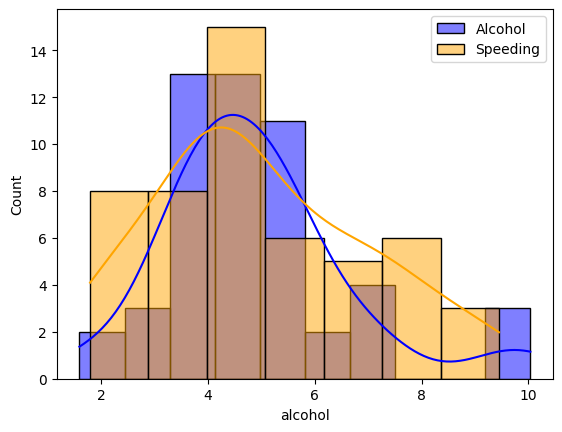

In [15]:
sns.histplot(car_crash['alcohol'], kde=True, color='blue', label='Alcohol')
sns.histplot(car_crash['speeding'], kde=True, color='orange', label='Speeding')
plt.legend()

Boxplot

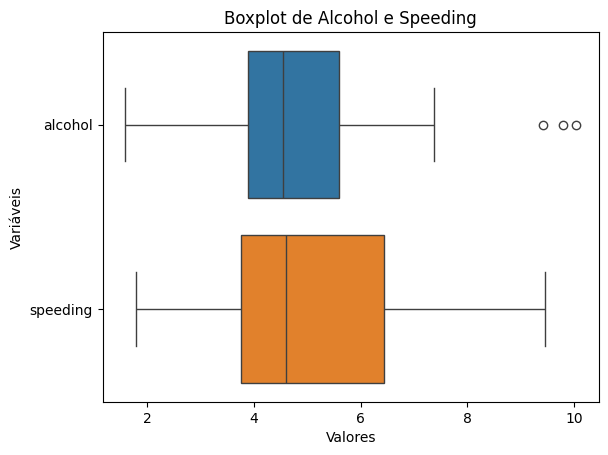

In [16]:
sns.boxplot(data=car_crash[['alcohol', 'speeding']], orient='h')
plt.title('Boxplot de Alcohol e Speeding')
plt.xlabel('Valores')
plt.ylabel('Variáveis')
plt.show()

Análise Bivariada



Mapa de Disperção

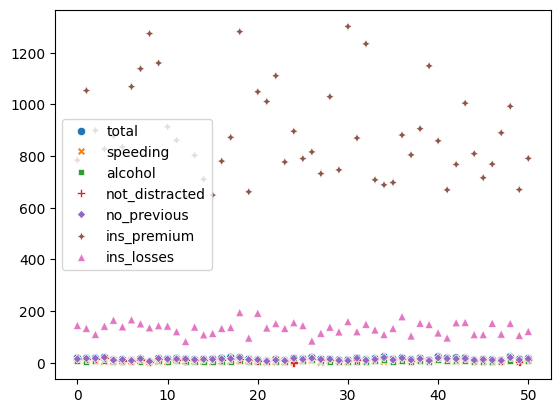

In [ ]:
sns.scatterplot(data=car_crash)

Percebe-se que os pontos de `alcohol`, `speeding`, `not_distracted` e `no_previous` estão muito próximos (ou seja, concentrados em uma faixa restrita, formando nuvens compactas), isso sim indica **baixa dispersão**.

**O que isso significa:**  
- Os valores dessas variáveis são semelhantes entre os registros analisados.
- Há pouca variabilidade, ou seja, a maioria dos casos apresenta valores próximos da média.
- Isso pode indicar um padrão mais homogêneo nesses fatores no seu conjunto de dados.

Portanto, se os pontos estão realmente concentrados, a dispersão é baixa.  
Se houver dúvidas, você pode calcular a variância ou o desvio padrão dessas variáveis para confirmar quantitativamente essa baixa dispersão.

Correlação entre estar alcolizado e está em excesso de velocidade

In [18]:
correlation = car_crash[['alcohol', 'speeding']].corr()
print("\nCorrelação entre álcool e velocidade:")
print(correlation)


Correlação entre álcool e velocidade:
           alcohol  speeding
alcohol   1.000000  0.669719
speeding  0.669719  1.000000


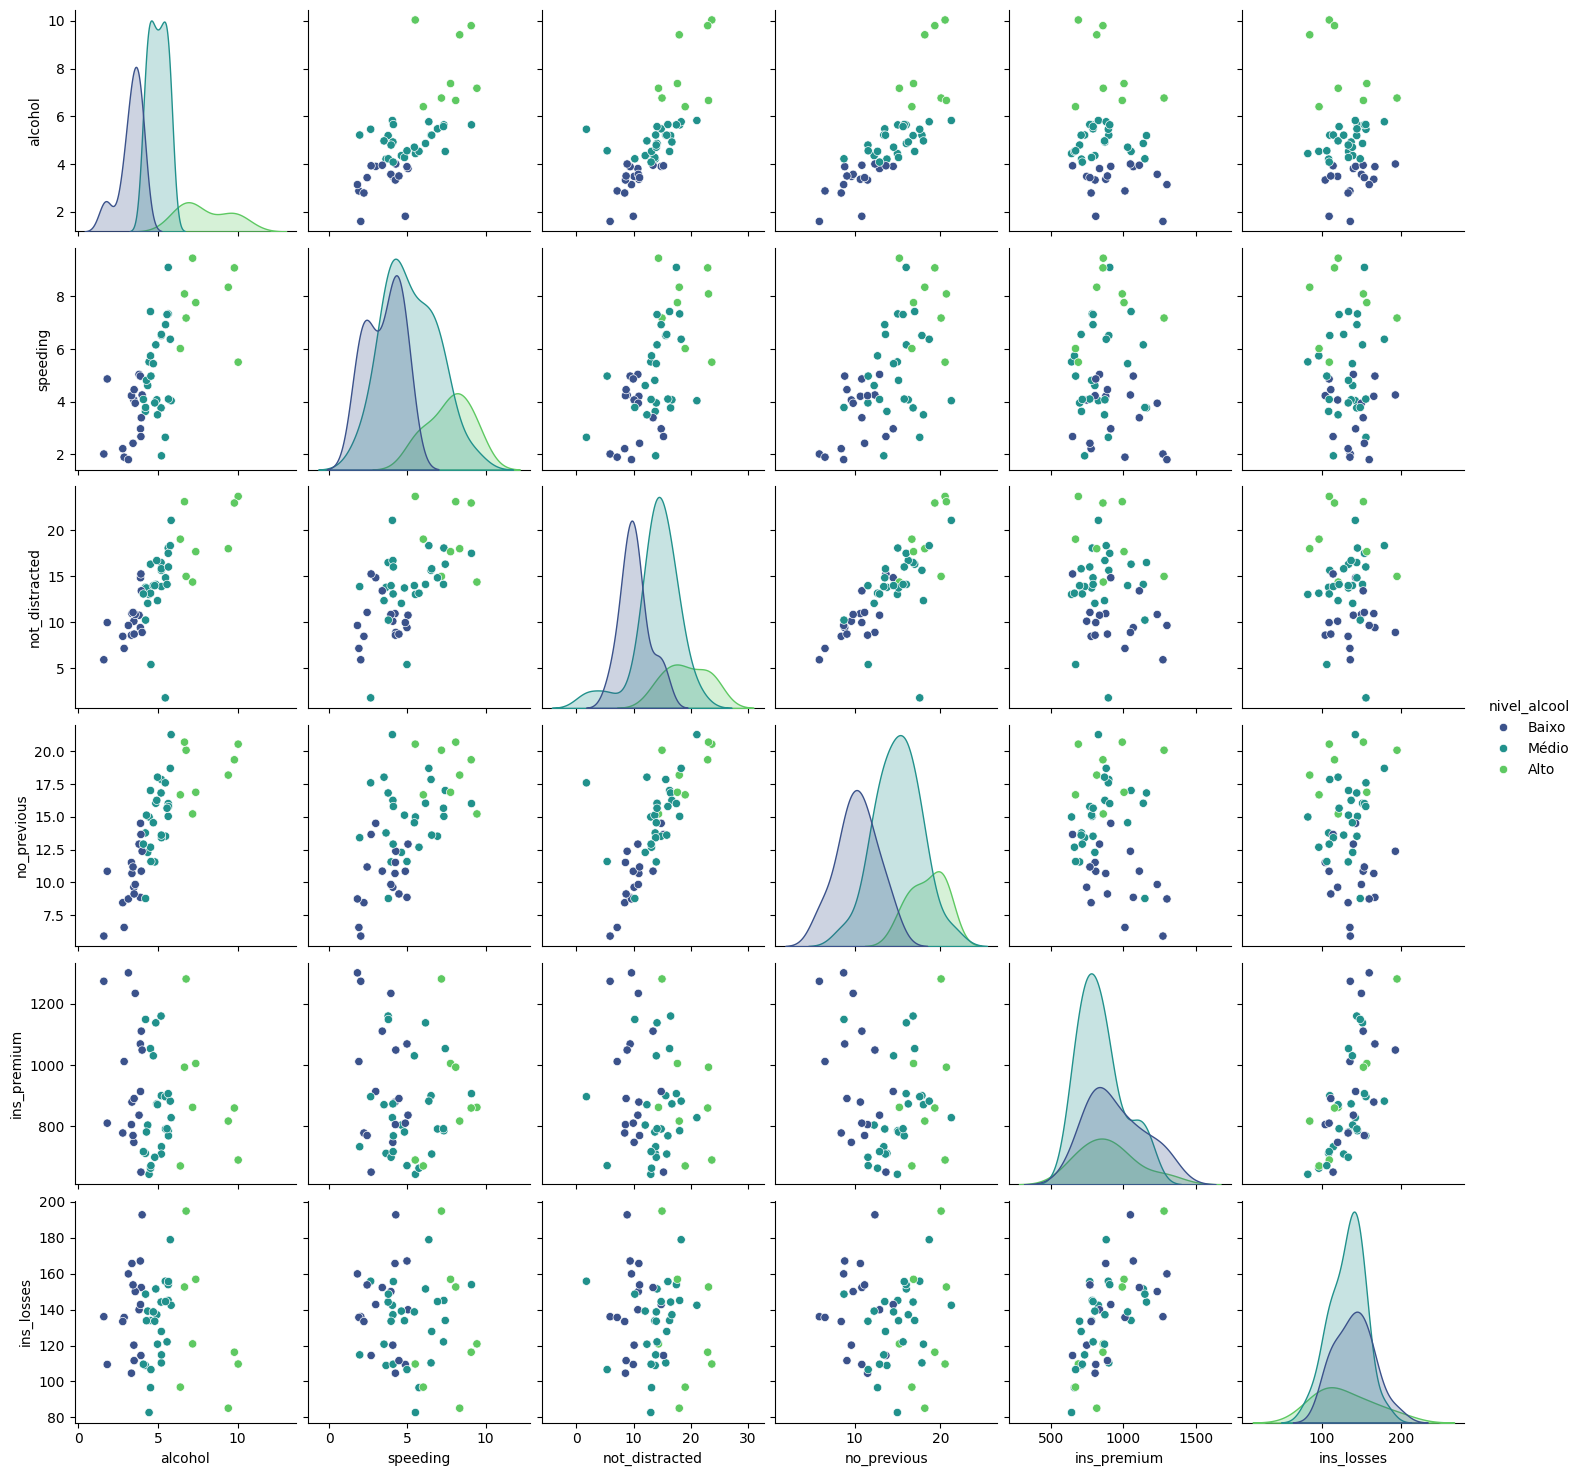

In [ ]:
bins = [0, 4, 6, 11]
labels = ['Baixo', 'Médio', 'Alto']

car_crash['nivel_alcool'] = pd.cut(car_crash['alcohol'], bins=bins, labels=labels, include_lowest=True)

sns.pairplot(
    car_crash,
    vars=['alcohol', 'speeding', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses'],
    diag_kind="kde",
    hue='nivel_alcool', 
    palette='viridis'
)
plt.show()


Analisando o pairplot apresentado, podemos tirar algumas conclusões:

1. **Correlação positiva:**  
   - As variáveis `alcohol`, `speeding`, `not_distracted` e `no_previous` apresentam uma tendência de correlação positiva entre si. Isso significa que, em geral, quando uma dessas variáveis aumenta, as outras também tendem a aumentar.
   - Isso é visível pelos pontos formando uma linha ascendente nos gráficos de dispersão entre essas variáveis.

2. **Distribuição dos níveis de álcool:**  
   - Os diferentes níveis de álcool (`nivel_alcool`: Baixo, Médio, Alto) estão bem distribuídos entre os dados, mas observa-se que os pontos de nível "Alto" (verde) tendem a estar mais concentrados em valores mais altos das variáveis analisadas.
   - Isso sugere que estados ou linhas com maior envolvimento de álcool também apresentam maiores valores de speeding, not_distracted e no_previous.

3. **Pouca correlação com variáveis de seguro:**  
   - As variáveis `ins_premium` e `ins_losses` não apresentam uma relação clara com as demais variáveis. Os pontos estão mais dispersos e não formam padrões evidentes de correlação.
   - Isso indica que o prêmio e as perdas de seguro não estão fortemente associados aos fatores de álcool, velocidade ou distração neste conjunto de dados.

4. **Distribuições individuais:**  
   - As distribuições (diagonais) mostram que a maioria dos dados está concentrada em faixas mais baixas para todas as variáveis, com exceção de `no_previous`, que apresenta uma distribuição mais espalhada.
5. **Speeding vs Alchohol:**  
 - O que mostra: Há uma relação positiva moderada. Os pontos tendem a subir da esquerda para a     
   direita, mas estão mais espalhados.
 - Insight: Estados com problemas de excesso de velocidade também tendem a ter problemas com álcool  ao volante, mas não é uma regra absoluta. Existem estados com alto índice de um fator e moderado do outro. Isso sugere que, embora os problemas coexistam, eles podem necessitar de políticas de segurança pública diferentes.

6. **Risco Moral:**

- A maioria das pessoas que nunca sofreram um acidente antes tendem a se envolver em algum acidente relacionado ao consumo de álcool. Esse excesso de confiança pode acarretar em uma falsa sensação de confiança.

**Resumo:**  
- Há uma relação positiva entre álcool, velocidade, distração e número de acidentes anteriores, especialmente para níveis mais altos de álcool. Já as variáveis relacionadas a seguro não apresentam correlação clara com esses fatores de risco. Isso pode indicar que políticas de prevenção devem focar nos fatores comportamentais (álcool, velocidade, distração) para reduzir acidentes.



Análise Multivariada


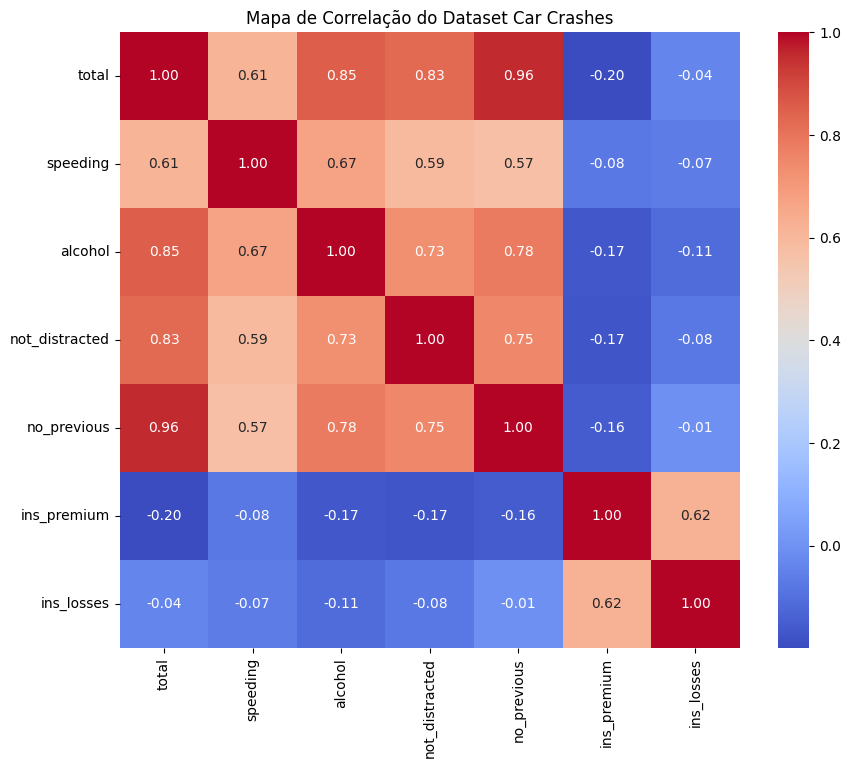

In [43]:
corr_matrix = car_crash.corr(numeric_only=True)

# Configurando o tamanho da figura para melhor visualização
plt.figure(figsize=(10, 8))

# Criando o heatmap com suas preferências
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação do Dataset Car Crashes')
plt.show()



**Relação entre Velocidade e Álcool:** Há uma correlação moderada (0.67) entre 'speeding' (excesso de velocidade) e 'alcohol' (álcool). Isso indica que estados com maior incidência de acidentes por excesso de velocidade também tendem a registrar mais acidentes relacionados ao consumo de álcool.

**Variáveis de Seguro:** As variáveis ligadas a seguros, como 'ins_premium' (prêmio do seguro) e 'ins_losses' (perdas de seguro), mostram uma baixa correlação com as demais variáveis do dataset. Isso sugere que não há uma relação direta significativa entre os fatores comportamentais de risco e os dados de seguro.

**Comportamentos de Risco Interligados:** As correlações positivas observadas entre 'alcohol', 'speeding', 'not_distracted' e 'no_previous' indicam que esses comportamentos de risco frequentemente ocorrem em conjunto.


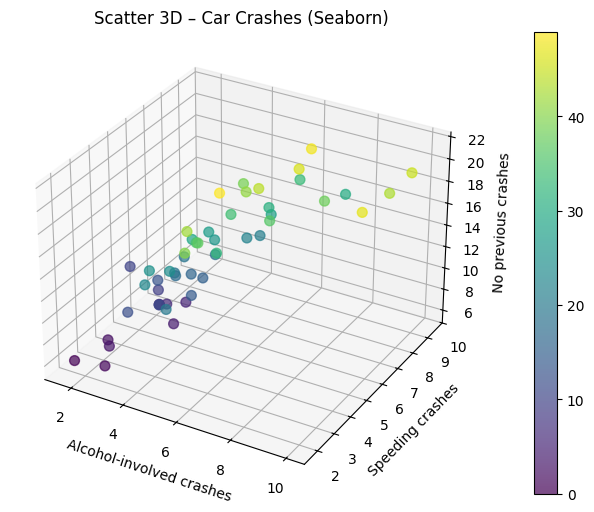

In [49]:
# Criar figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
sc = ax.scatter(
    car_crash['alcohol'],
    car_crash['speeding'],
    car_crash['no_previous'],
    c=car_crash['no_previous'].astype('category').cat.codes,
    cmap='viridis',  # paleta de cores
    s=50,  # tamanho dos pontos
    alpha=0.7
)

# Legenda para o gradiente de cores
cbar = fig.colorbar(sc, ax=ax, pad=0.1)

# Rótulos dos eixos
ax.set_xlabel('Alcohol‑involved crashes')
ax.set_ylabel('Speeding crashes')
ax.set_zlabel('No previous crashes')

ax.set_title('Scatter 3D – Car Crashes (Seaborn)')

plt.show()

Mesma coisa evidenciada nas análises anteriores. Variáveis como acidentes envolvendo embreaguez, excesso de velocidade e nenhum acidente prévio andam juntas.
